In [1]:
import numpy as np
from torchvision import datasets, transforms
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_indices = np.random.choice(len(train_data), size=500, replace=False)
test_indices = np.random.choice(len(test_data), size=100, replace=False)

X_train = train_data.data[train_indices].numpy()
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = train_data.targets[train_indices].numpy()

X_test = test_data.data[test_indices].numpy()
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = test_data.targets[test_indices].numpy()

100%|██████████| 26.4M/26.4M [00:00<00:00, 112MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 9.39MB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 59.5MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.7MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [3]:
gb_model = GradientBoostingClassifier(n_estimators=10, max_depth=2, learning_rate=0.1, random_state=42)

gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.3f}")

Gradient Boosting Accuracy: 0.640


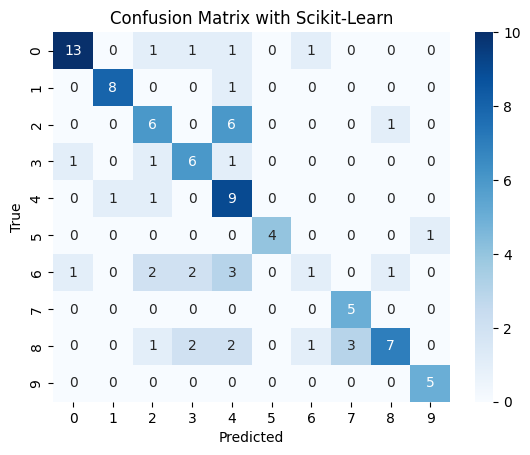

Precision (Weighted): 0.665
Recall (Weighted): 0.640
F1-Score (Weighted): 0.626


In [4]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, gb_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', vmin=0, vmax=10)

plt.title('Confusion Matrix with Scikit-Learn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

precision_weighted = precision_score(y_test, gb_predictions, average='weighted')
recall_weighted = recall_score(y_test, gb_predictions, average='weighted')
f1_weighted = f1_score(y_test, gb_predictions, average='weighted')

print(f"Precision (Weighted): {precision_weighted:.3f}")
print(f"Recall (Weighted): {recall_weighted:.3f}")
print(f"F1-Score (Weighted): {f1_weighted:.3f}")
